# Filter

What is done here

In [1]:
import numpy as num
import matplotlib.pyplot as plt

import pandas as pd

In [2]:
file = 'data/hourly_data_xxxx.txt' # https://opendata.dwd.de/climate_environment/CDC/observations_germany/climate/hourly/air_temperature/historical/

df = pd.read_csv(file, sep=';')

In [18]:
df['year'] = df['MESS_DATUM'].astype(str).str.slice(0, 4)
df['month'] = df['MESS_DATUM'].astype(str).str.slice(4, 6)
df['day'] = df['MESS_DATUM'].astype(str).str.slice(6, 8)
df['minute'] = df['MESS_DATUM'].astype(str).str.slice(8,10).astype(float) * 60

df['datetime'] = pd.to_datetime(df[['year', 'month', 'day', 'minute']])


df['seconds'] = (df[timecol] - df[timecol][0]).dt.total_seconds() 
print(df[['datetime', 'seconds']])

                  datetime       seconds
0      1950-04-01 01:00:00  0.000000e+00
1      1950-04-01 02:00:00  3.600000e+03
2      1950-04-01 03:00:00  7.200000e+03
3      1950-04-01 04:00:00  1.080000e+04
4      1950-04-01 05:00:00  1.440000e+04
...                    ...           ...
534714 2011-03-31 19:00:00  1.924970e+09
534715 2011-03-31 20:00:00  1.924974e+09
534716 2011-03-31 21:00:00  1.924978e+09
534717 2011-03-31 22:00:00  1.924981e+09
534718 2011-03-31 23:00:00  1.924985e+09

[534719 rows x 2 columns]


In [42]:
tempcol = 'TT_TU'
# tempcol = 'HLY-TEMP-NORMAL'
timecol = 'seconds'

xdata = df[timecol]
ydata = df[tempcol]

dt = (60*60)

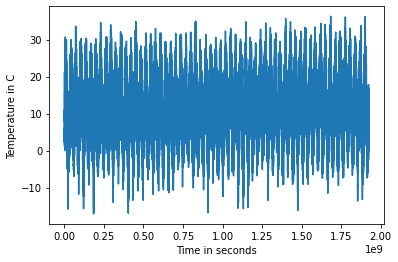

In [43]:
plt.figure()
plt.plot(xdata, ydata)
plt.xlabel('Time in seconds')
plt.ylabel('Temperature in C')
plt.show()

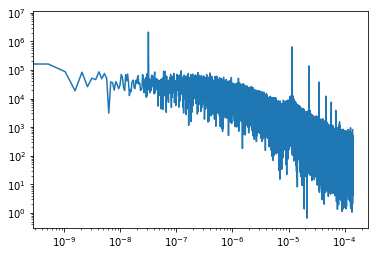

In [44]:
sp = num.fft.rfft(df[tempcol])
freq = num.fft.rfftfreq(len(df[timecol]), d=dt)

plt.figure()
plt.loglog(freq, abs(sp))

plt.show()

Butterworth
Nyquist Frequency

In [50]:
from scipy import signal

# Filter requirements.
filterfreq = 0.0000001

order = 4
nyq = 2 # nyquist
fs = 1 / dt # sampling frequency
w = filterfreq / (fs / 2)

print(fs, w)

0.0002777777777777778 0.0007199999999999999


In [51]:
# Filter the data, and plot both the original and filtered signals.
sos = signal.butter(order, w, 'low', output='sos')
yfilt = signal.sosfilt(sos, ydata)

print(yfilt)

[9.29825787e-12 8.34662338e-11 3.79048829e-10 ... 4.18487668e+00
 4.18857441e+00 4.19227109e+00]


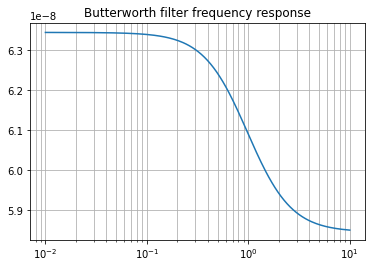

In [52]:
b, a = sos = signal.butter(4, 0.01, 'low')
w, h = signal.freqs(b, a)

plt.semilogx(w, abs(h))
plt.title('Butterworth filter frequency response')

plt.grid(which='both', axis='both')

#plt.axvline(100, color='green') # cutoff frequency

plt.show()

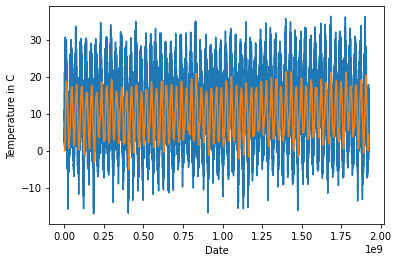

In [53]:

plt.Figure()
plt.plot(xdata, ydata)
plt.plot(xdata, yfilt)
plt.xlabel('Date')
plt.ylabel('Temperature in C')
plt.show()